In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from morphing.warping import mul_line_warping, LinePair

In [2]:
CHEETAH = "images/cheetah.jpg"
WOMAN = "images/women.jpg"

In [3]:
def show_line(start, end, color="blue"):
    plt.plot([start[1], end[1]], [start[0], end[0]], color=color, linewidth=2)

In [4]:
woman_img = Image.open(WOMAN)
cheeta_img = Image.open(CHEETAH)

In [5]:
woman_img_array = np.array(woman_img) / 255.0
cheeta_img_array = np.array(cheeta_img) / 255.0
lp_array = [LinePair(np.array([20, 10]), np.array([25, 80]), \
              np.array([45, 60]), np.array([45, 95])), 
              LinePair(np.array([25, 175]), np.array([20, 245]), \
              np.array([45, 140]), np.array([45, 170])), 
              LinePair(np.array([50, 127]), np.array([120, 127]), \
              np.array([50, 116]), np.array([110, 116])),
              LinePair(np.array([180, 100]), np.array([180, 160]), \
              np.array([130, 90]), np.array([130, 140])),]

reverse_lp_array = []

for lp in lp_array:
    reverse_lp_array.append(lp.reverse())

alpha = 0.3
woman_new_img_array = mul_line_warping(woman_img_array, reverse_lp_array, alpha=alpha)
cheeta_new_img_array = mul_line_warping(cheeta_img_array, lp_array, alpha=1 - alpha)
            



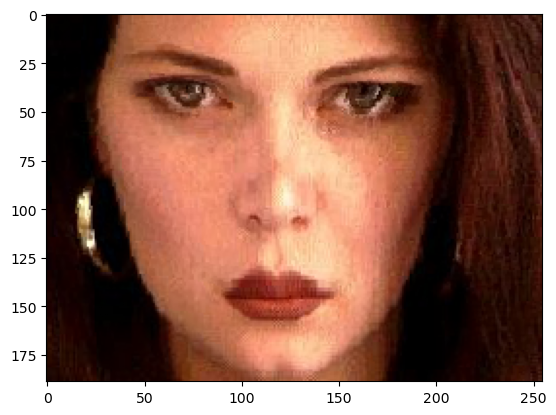

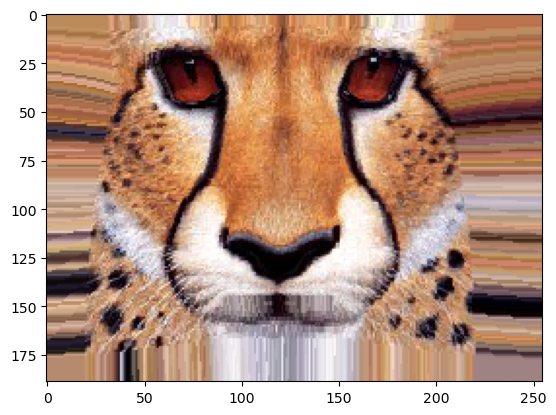

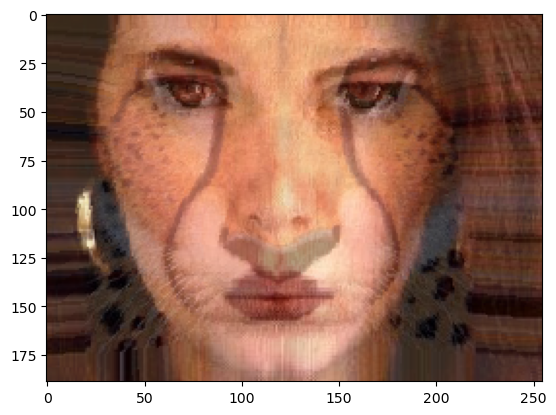

In [7]:
plt.imshow(woman_new_img_array)
plt.show()
plt.imshow(cheeta_new_img_array)
plt.show()
plt.imshow(np.array(woman_new_img_array) * (1 - alpha) + cheeta_new_img_array * alpha)
plt.show()